In [1]:
import mesa

from epstein_network_civil_violence.agent import Inhabitant, Police
from epstein_network_civil_violence.model import EpsteinNetworkCivilViolence
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Index(['x', 'y', 'breed', 'jail_sentence', 'condition', 'arrest_probability',
       'regime_legitimacy'],
      dtype='object')
AgentID
878     0.8
422     0.8
953     0.8
105     0.8
259     0.8
       ... 
695     0.8
1228    0.8
424     0.8
58      0.8
283     0.8
Name: regime_legitimacy, Length: 1274, dtype: float64
AgentID
640     NaN
1084    0.8
788     0.8
680     NaN
681     NaN
       ... 
853     0.8
980     0.8
404     0.8
1082    0.8
469     0.8
Name: regime_legitimacy, Length: 1274, dtype: float64


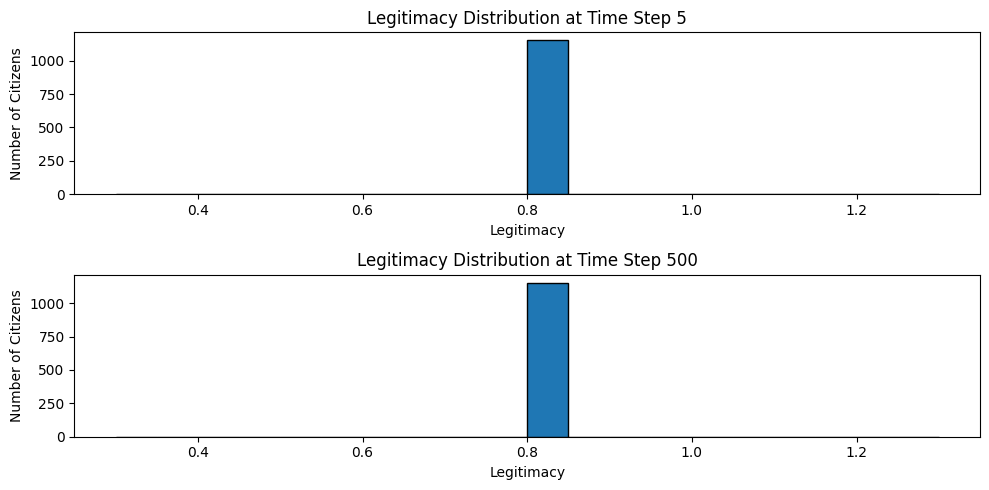

In [2]:
model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=300,
    alpha=0.1,
    jail_factor=1.1,
    legitimacy_impact=0.002,
    use_mean_field=True,
    legitimacy_width=0.1,
    cop_density_mode='constant',
    legitimacy_mode='constant'
)

for i in range(501):  # 运行模型51步
    model.step()

# 提取数据
agent_data = model.datacollector.get_agent_vars_dataframe()

# 检查数据框中是否存在 "legitimacy" 列
print(agent_data.columns)

# 选择特定时间步的数据
time_steps = [5, 500]
fig, axs = plt.subplots(len(time_steps), 1, figsize=(10, 5))

for i, step in enumerate(time_steps):
    step_data = agent_data.xs(step, level="Step")
    legitimacy_values = step_data['regime_legitimacy']
    print(legitimacy_values)

    # 绘制直方图
    axs[i].hist(legitimacy_values, bins=20, edgecolor='black')
    axs[i].set_title(f'Legitimacy Distribution at Time Step {step}')
    axs[i].set_xlabel('Legitimacy')
    axs[i].set_ylabel('Number of Citizens')

plt.tight_layout()
plt.show()

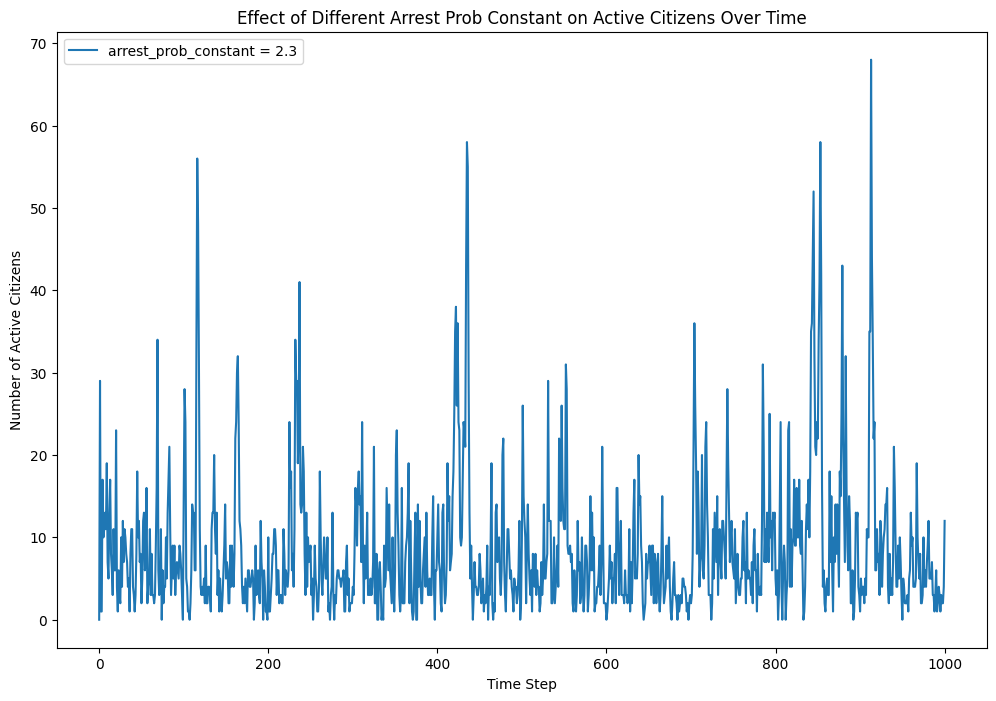

In [3]:
def run_model_with_different_arrest_prob_constant(arrest_prob_constant):
    model = EpsteinNetworkCivilViolence(
        width=40,
        height=40,
        citizen_density=0.7,
        cop_density=0.04,
        citizen_vision=5,
        cop_vision=5,
        legitimacy=0.77,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=arrest_prob_constant,
        movement=True,
        max_iters=1000,
        alpha=0,
        jail_factor = 1,
        legitimacy_impact=0.01,
        legitimacy_width=0.1,
        use_mean_field=False
    )
    
    for _ in range(1000):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

arrest_prob_constant_values = [2.3]
results = {}

for arrest_prob_constant in arrest_prob_constant_values:
    results[arrest_prob_constant] = run_model_with_different_arrest_prob_constant(arrest_prob_constant)

plt.figure(figsize=(12, 8))
for arrest_prob_constant, active_data in results.items():
    plt.plot(active_data, label=f'arrest_prob_constant = {arrest_prob_constant}') 
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different Arrest Prob Constant on Active Citizens Over Time')
plt.legend()
plt.show()

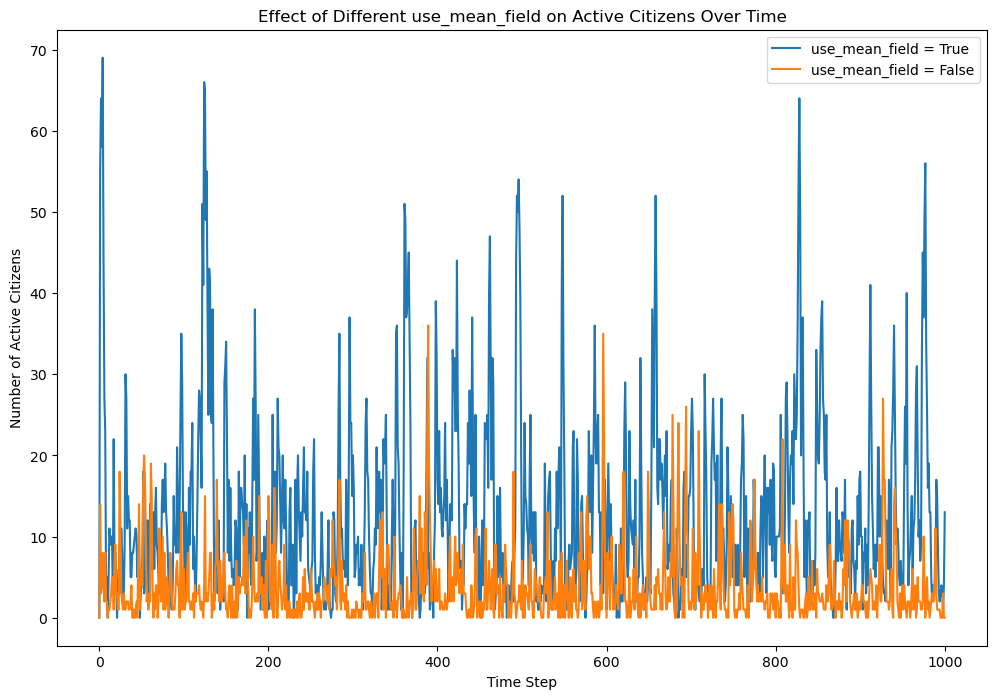

In [41]:
def run_model_with_different_use_mean_field(use_mean_field=False):
    model = EpsteinNetworkCivilViolence(
        width=40,
        height=40,
        citizen_density=0.7,
        cop_density=0.04,
        citizen_vision=5,
        cop_vision=5,
        legitimacy=0.77,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000,
        alpha=0,
        jail_factor = 1,
        legitimacy_impact=0.01,
        legitimacy_width=0.1,
    )
    
    for _ in range(1000):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

use_mean_field_conditions = [True, False]
results = {}

for use_mean_field in use_mean_field_conditions:
    results[use_mean_field] = run_model_with_different_use_mean_field(use_mean_field)

plt.figure(figsize=(12, 8))
for use_mean_field, active_data in results.items():
    plt.plot(active_data, label=f'use_mean_field = {use_mean_field}') 
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different use_mean_field on Active Citizens Over Time')
plt.legend()
plt.show()

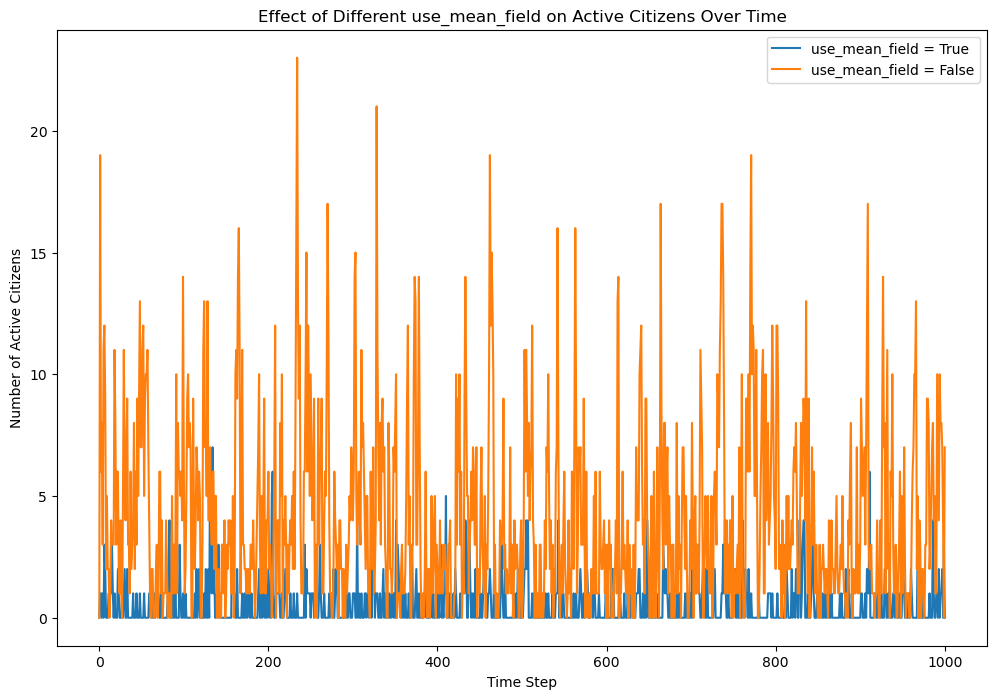

In [45]:
def run_model_with_different_use_mean_field(use_mean_field=False):
    model = EpsteinNetworkCivilViolence(
        width=40,
        height=40,
        citizen_density=0.7,
        cop_density=0.04,
        citizen_vision=5,
        cop_vision=5,
        legitimacy=0.87,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000,
        alpha=0,
        jail_factor = 1,
        legitimacy_impact=0.01,
        legitimacy_width=0.1,
    )
    
    for _ in range(1000):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

use_mean_field_conditions = [True, False]
results = {}

for use_mean_field in use_mean_field_conditions:
    results[use_mean_field] = run_model_with_different_use_mean_field(use_mean_field)

plt.figure(figsize=(12, 8))
for use_mean_field, active_data in results.items():
    plt.plot(active_data, label=f'use_mean_field = {use_mean_field}') 
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different use_mean_field on Active Citizens Over Time')
plt.legend()
plt.show()

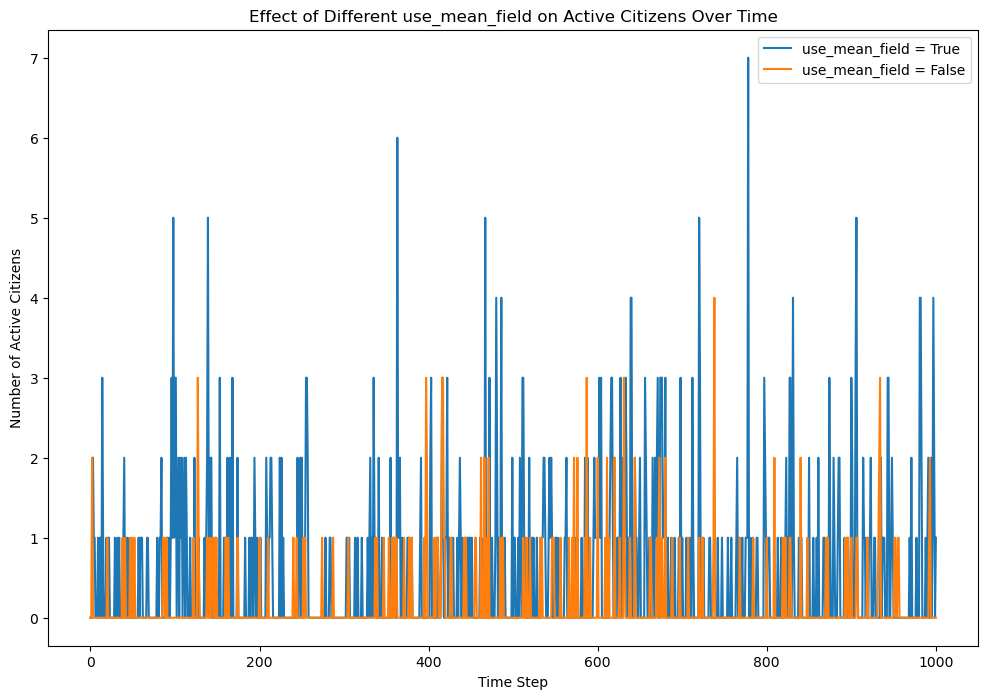

In [46]:
def run_model_with_different_use_mean_field(use_mean_field=False):
    model = EpsteinNetworkCivilViolence(
        width=40,
        height=40,
        citizen_density=0.7,
        cop_density=0.04,
        citizen_vision=5,
        cop_vision=5,
        legitimacy=0.89,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000,
        alpha=0,
        jail_factor = 1,
        legitimacy_impact=0.01,
        legitimacy_width=0.1,
        use_mean_field=False
    )
    
    for _ in range(1000):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

use_mean_field_conditions = [True, False]
results = {}

for use_mean_field in use_mean_field_conditions:
    results[use_mean_field] = run_model_with_different_use_mean_field(use_mean_field)

plt.figure(figsize=(12, 8))
for use_mean_field, active_data in results.items():
    plt.plot(active_data, label=f'use_mean_field = {use_mean_field}') 
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different use_mean_field on Active Citizens Over Time')
plt.legend()
plt.show()

Overall Progress: 100%|██████████| 2/2 [11:40<00:00, 350.05s/it]


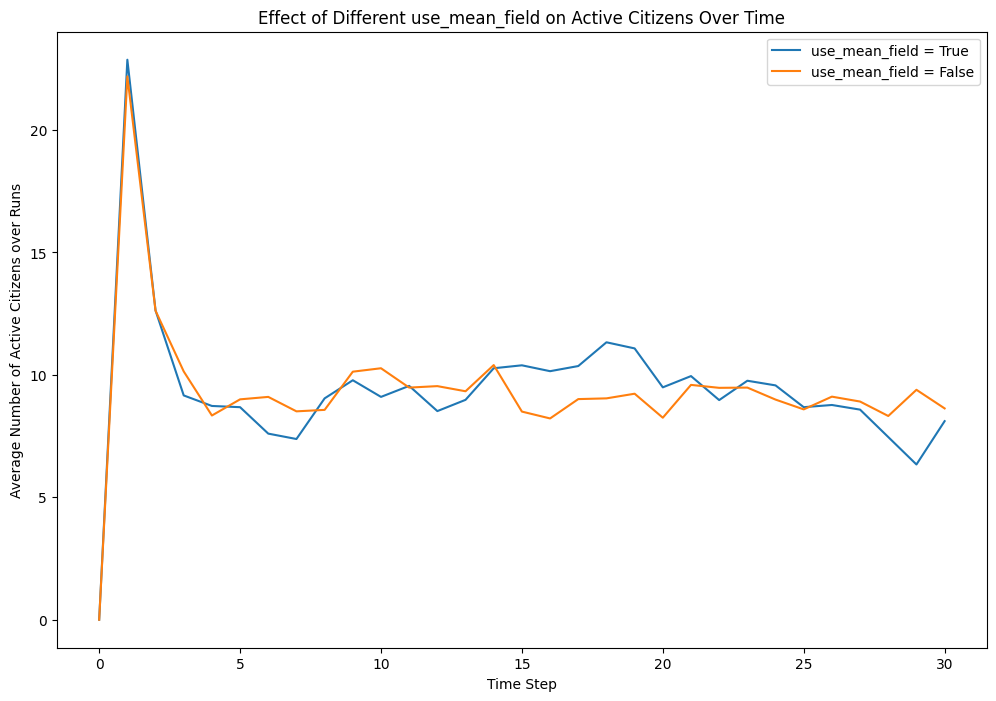

In [11]:
#JULIUS: Average over multiple runs with re-initializing different models for each run and mode
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def run_model_with_different_use_mean_field(use_mean_field, num_runs):
    # Initialize a list to store the results of each run
    all_runs_active_data = []
    
    # Wrap the loop with tqdm for progress tracking
    for _ in tqdm(range(num_runs), desc=f"Runs for use_mean_field={use_mean_field}"):
        # Create the model instance with the specified use_mean_field
        model = EpsteinNetworkCivilViolence(
            width=40,
            height=40,
            citizen_density=0.7,
            cop_density=0.04,
            citizen_vision=5,
            cop_vision=5,
            legitimacy=0.77,
            max_jail_term=15,
            active_threshold=0.1,
            arrest_prob_constant=2.3,
            movement=True,
            max_iters=1000,
            alpha=0,
            jail_factor=1,
            legitimacy_impact=0.01,
            legitimacy_width=0.1,
            use_mean_field=use_mean_field
        )
        
        # Run the model for the specified number of steps
        for _ in range(30):
            model.step()
        
        # Collect the data from the model
        data = model.datacollector.get_model_vars_dataframe()
        all_runs_active_data.append(data['Active'])
    
    # Convert the list of results to a NumPy array for easier averaging
    all_runs_active_data = np.array(all_runs_active_data)
    
    # Calculate the average across all runs for each time step
    average_active_data = np.mean(all_runs_active_data, axis=0)
    
    return average_active_data

# Define the different use_mean_field conditions to test
use_mean_field_conditions = [True, False]
results = {}

# Wrap the main loop with tqdm for overall progress tracking
for use_mean_field in tqdm(use_mean_field_conditions, desc="Overall Progress"):
    results[use_mean_field] = run_model_with_different_use_mean_field(use_mean_field, num_runs=100)

# Plot the average number of active citizens over time for each use_mean_field condition
plt.figure(figsize=(12, 8))
for use_mean_field, average_active_data in results.items():
    plt.plot(average_active_data, label=f'use_mean_field = {use_mean_field}') 
plt.xlabel('Time Step')
plt.ylabel('Average Number of Active Citizens over Runs')
plt.title('Effect of Different use_mean_field on Active Citizens Over Time')
plt.legend()
plt.show()


Overall Progress: 100%|██████████| 10/10 [03:50<00:00, 23.10s/it]


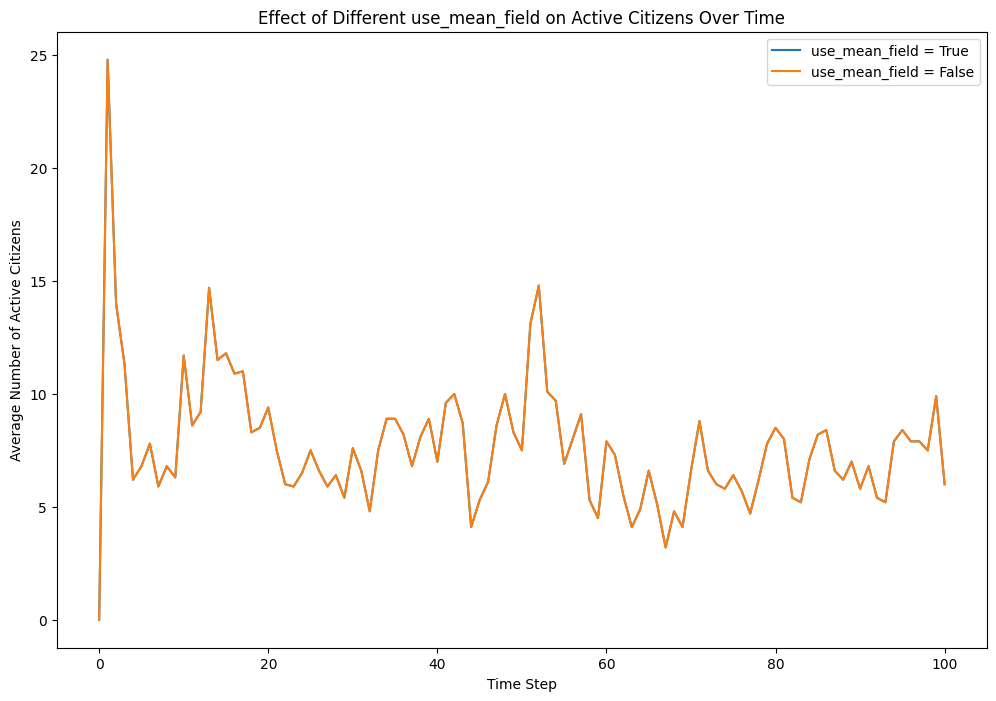

In [12]:
#JULIUS: Average over multiple runs with re-initializing different models for each run but keeping the same model for both modes
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def run_single_model_instance(model, use_mean_field):
    model.use_mean_field = use_mean_field

    # Run the model for the specified number of steps
    for _ in range(100):
        model.step()

    # Collect the data from the model
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']

def run_model_with_different_use_mean_field(num_runs):
    # Initialize lists to store the results for each condition
    all_active_data_true = []
    all_active_data_false = []

    # Wrap the loop with tqdm for progress tracking
    for _ in tqdm(range(num_runs), desc="Overall Progress"):
        # Initialize the model
        model = EpsteinNetworkCivilViolence(
            width=40,
            height=40,
            citizen_density=0.7,
            cop_density=0.04,
            citizen_vision=5,
            cop_vision=5,
            legitimacy=0.77,
            max_jail_term=15,
            active_threshold=0.1,
            arrest_prob_constant=2.3,
            movement=True,
            max_iters=1000,
            alpha=0,
            jail_factor=1,
            legitimacy_impact=0.01,
            legitimacy_width=0.1,
            use_mean_field=False  # Initial state, will be overwritten
        )

        # Run the model with use_mean_field = True
        active_data_true = run_single_model_instance(copy.deepcopy(model), True)
        all_active_data_true.append(active_data_true)

        # Run the model with use_mean_field = False
        active_data_false = run_single_model_instance(copy.deepcopy(model), False)
        all_active_data_false.append(active_data_false)

    all_active_data_true = np.array(all_active_data_true)
    all_active_data_false = np.array(all_active_data_false)

    # Calculate the average across all runs for each time step
    average_active_data_true = np.mean(all_active_data_true, axis=0)
    average_active_data_false = np.mean(all_active_data_false, axis=0)

    return average_active_data_true, average_active_data_false

# Run the simulations and collect the average results for each condition
num_runs = 10
average_active_data_true, average_active_data_false = run_model_with_different_use_mean_field(num_runs)

# Plot the average number of active citizens over time for each use_mean_field condition
plt.figure(figsize=(12, 8))
plt.plot(average_active_data_true, label='use_mean_field = True')
plt.plot(average_active_data_false, label='use_mean_field = False')
plt.xlabel('Time Step')
plt.ylabel('Average Number of Active Citizens')
plt.title('Effect of Different use_mean_field on Active Citizens Over Time')
plt.legend()
plt.show()


In [ ]:
model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=300,
    alpha=0.1,
    jail_factor=1.1,
    legitimacy_impact=0.002,
    use_mean_field=True,
    legitimacy_width=0.1,
    cop_density_mode='constant',
    legitimacy_mode='constant'
)

for i in range(501):  # 运行模型51步
    model.step()

# 提取数据
agent_data = model.datacollector.get_agent_vars_dataframe()

# 检查数据框中是否存在 "legitimacy" 列
print(agent_data.columns)

# 选择特定时间步的数据
time_steps = [5, 500]
fig, axs = plt.subplots(len(time_steps), 1, figsize=(10, 5))

for i, step in enumerate(time_steps):
    step_data = agent_data.xs(step, level="Step")
    legitimacy_values = step_data['regime_legitimacy']
    print(legitimacy_values)

    # 绘制直方图
    axs[i].hist(legitimacy_values, bins=20, edgecolor='black')
    axs[i].set_title(f'Legitimacy Distribution at Time Step {step}')
    axs[i].set_xlabel('Legitimacy')
    axs[i].set_ylabel('Number of Citizens')

plt.tight_layout()
plt.show()

In [2]:
COP_COLOR = "#000000"
AGENT_QUIET_COLOR = "#648FFF"
AGENT_REBEL_COLOR = "#FE6100"
JAIL_COLOR = "#808080"
JAIL_SHAPE = "rect"


def citizen_cop_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if type(agent) is Inhabitant:
        color = (
            AGENT_QUIET_COLOR if agent.condition == "Quiescent" else AGENT_REBEL_COLOR
        )
        color = JAIL_COLOR if agent.jail_sentence else color
        shape = JAIL_SHAPE if agent.jail_sentence else "circle"
        portrayal["Color"] = color
        portrayal["Shape"] = shape
        if shape == "rect":
            portrayal["w"] = 0.9
            portrayal["h"] = 0.9
        else:
            portrayal["r"] = 0.5
            portrayal["Filled"] = "false"
        portrayal["Layer"] = 0

    elif type(agent) is Police:
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.9
        portrayal["Layer"] = 1

    return portrayal


model_params = {
    "height": 40,
    "width": 40,
    "citizen_density": mesa.visualization.Slider(
        "Initial Agent Density", 0.7, 0.0, 0.9, 0.1
    ),
    "cop_density": mesa.visualization.Slider(
        "Initial Cop Density", 0.04, 0.0, 0.1, 0.01
    ),
    "citizen_vision": mesa.visualization.Slider("Citizen Vision", 7, 1, 10, 1),
    "cop_vision": mesa.visualization.Slider("Cop Vision", 7, 1, 10, 1),
    "legitimacy": mesa.visualization.Slider(
        "Government Legitimacy", 0.82, 0.0, 1, 0.01
    ),
    "max_jail_term": mesa.visualization.Slider("Max Jail Term", 30, 0, 50, 1),
    "alpha": mesa.visualization.Slider("Alpha", 0.1, 0.0, 0.5, 0.1),
    "jail_factor": mesa.visualization.Slider("Jail Factor", 1.1, 1.0, 1.5, 0.1),
    # "impact_chance": mesa.visualization.Slider("Impact Chance", 0.5, 0.1, 1.0, 0.1),
    "use_mean_field": mesa.visualization.Slider("Use Mean Field", 1, 0, 1, 1),
    "legitimacy_impact": mesa.visualization.Slider("Legitimacy Impact", 0.1, 0.0, 1, 0.1),
    "legitimacy_width": mesa.visualization.Slider("legitimacy_width", 0.1, 0.0, 0.5, 0.01),
    # "incitation_threshold": mesa.visualization.Slider("Incitation Threshold", 10, 0.0, 100, 10),
}
canvas_element = mesa.visualization.CanvasGrid(citizen_cop_portrayal, 40, 40, 480, 480)
chart = mesa.visualization.ChartModule(
    [
        {"Label": "Quiescent", "Color": "#648FFF"},
        {"Label": "Active", "Color": "#FE6100"},
        {"Label": "Jailed", "Color": "#808080"},
    ],
    data_collector_name="datacollector",
)
server = mesa.visualization.ModularServer(
    EpsteinNetworkCivilViolence,
    [
        canvas_element,
        chart,
    ],
    "Epstein Network Civil Violence",
    model_params,
)

server.launch()

Interface starting at http://127.0.0.1:8521
Socket opened!
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"reset"}
{"type":"reset"}
{"type":"submit_params","param":"citizen_vision","value":6}
{"type":"submit_params","param":"citizen_vision","value":5}
{"type":"submit_params","param":"cop_vision","value":6}
{"type":"submit_params","param":"cop_vision","value":5}
{"type":"submit_params","param":"legitimacy","value":0.78}
{"type":"submit_params","param":"legitimacy","value":0.79}
{"type":"submit_params","param":"legitimacy","value":0.8}
{"type":"submit_params","param":"legitimacy","value":0.81}
{"type":"submit_params","param":"legitimacy","value":0.8}
{"type":"submit_params","param":"alpha","value":0}
{"type":"submit_params","param":"jail_factor","value":1}
{"type":"submit_params","param":"use_mean_field","value":0}
{"type":"get_step","step":1}
{"type":"get_step","ste

In [2]:
# server for Citizen grievance_intensity

# from epstein_network_civil_violence.epstein_civil_violence.agent import Cop
COP_COLOR = "#000000"
def citizen_grievance_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if type(agent) is Inhabitant:
        # Adjust color based on level of grievance; lower grievance closer to white
        grievance_intensity = int((1 - agent.grievance) * 255)  # Convert grievance level to color intensity
        color = f'#FF{grievance_intensity:02X}{grievance_intensity:02X}'  # Generate color code
        shape = "circle"
        
        portrayal["Color"] = color
        portrayal["Shape"] = shape
        portrayal["r"] = 0.5  
        portrayal["Filled"] = "true"
        portrayal["Layer"] = 0

    elif type(agent) is Police:
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.9
        portrayal["Layer"] = 1

    return portrayal

model_params = {
    "height": 40,
    "width": 40,
    "citizen_density": mesa.visualization.Slider(
        "Initial Agent Density", 0.7, 0.0, 0.9, 0.1
    ),
    "cop_density": mesa.visualization.Slider(
        "Initial Cop Density", 0.05, 0.0, 0.1, 0.01
    ),
    "citizen_vision": mesa.visualization.Slider("Citizen Vision", 6, 1, 10, 1),
    "cop_vision": mesa.visualization.Slider("Cop Vision", 5, 1, 10, 1),
    "legitimacy": mesa.visualization.Slider(
        "Government Legitimacy", 0.82, 0.0, 1, 0.01
    ),
    "max_jail_term": mesa.visualization.Slider("Max Jail Term", 30, 0, 50, 1),
    "alpha": mesa.visualization.Slider("Alpha", 0.1, 0.0, 0.5, 0.1),
    "jail_factor": mesa.visualization.Slider("Jail Factor", 1.1, 1.0, 1.5, 0.1),
    "impact_chance": mesa.visualization.Slider("Impact Chance", 0.5, 0.1, 1.0, 0.1),
    "legitimacy_impact": mesa.visualization.Slider("Legitimacy Impact", 0.01, 0.0, 0.05, 0.01),
    "incitation_threshold": mesa.visualization.Slider("Incitation Threshold", 10, 0.0, 100, 10),
}
canvas_element = mesa.visualization.CanvasGrid(citizen_grievance_portrayal, 40, 40, 480, 480)
chart = mesa.visualization.ChartModule(
    [
        {"Label": "Active", "Color": "#FE6100"},
    ],
    data_collector_name="datacollector",
)
server = mesa.visualization.ModularServer(
    EpsteinNetworkCivilViolence,
    [
        canvas_element,
        chart,
    ],
    "Epstein Network Civil Violence",
    model_params,
)

server.launch()

Interface starting at http://127.0.0.1:8521
Socket opened!
{"type":"reset"}


Outburst ends at step 9
Outburst starts, wait time recorded: 1
Outburst ends at step 15
Outburst starts, wait time recorded: 1
Outburst ends at step 17
Outburst starts, wait time recorded: 1
Outburst ends at step 19
Outburst starts, wait time recorded: 1
Outburst ends at step 21
Outburst starts, wait time recorded: 1
Outburst ends at step 23
Outburst starts, wait time recorded: 5
Outburst ends at step 29
Outburst starts, wait time recorded: 2
Outburst ends at step 33
Outburst starts, wait time recorded: 5
Outburst ends at step 41
Outburst starts, wait time recorded: 1
Outburst ends at step 43
Outburst starts, wait time recorded: 5
Outburst ends at step 50
Outburst starts, wait time recorded: 1
Outburst ends at step 52
Outburst starts, wait time recorded: 1
Outburst ends at step 54
Outburst starts, wait time recorded: 1
Outburst ends at step 57
Outburst starts, wait time recorded: 2
Outburst ends at step 60
Outburst starts, wait time recorded: 3
Outburst ends at step 64
Outburst starts,

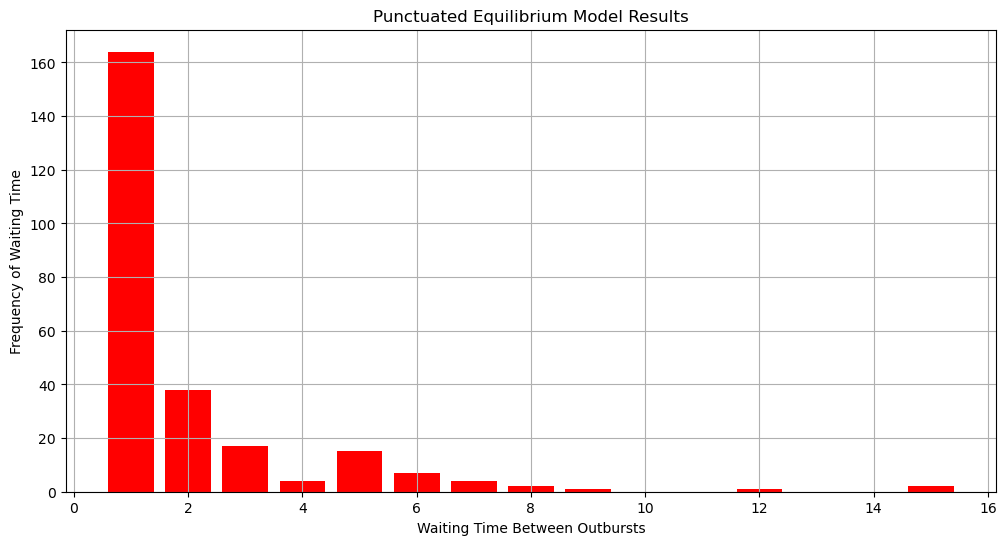

In [2]:
# figure5

model = EpsteinNetworkCivilViolence(
    width=20,
    height=20,
    citizen_density=0.7,
    cop_density=0.04,
    citizen_vision=5,
    cop_vision=5,
    legitimacy=0.85,
    max_jail_term=15,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
    alpha=0,
    jail_factor=1,
    legitimacy_impact=0.01,
    incitation_threshold=10
)

for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# Assume model has been run and waiting_times have been collected as follows:
waiting_times = model.waiting_times

# Convert list to numpy array for easier manipulation
waiting_times_array = np.array(waiting_times)

# Get unique waiting times and their counts
unique_times, counts = np.unique(waiting_times_array, return_counts=True)

# Plotting the frequencies against the waiting times
plt.figure(figsize=(12, 6))
plt.bar(unique_times, counts, color='red')
plt.xlabel('Waiting Time Between Outbursts')
plt.ylabel('Frequency of Waiting Time')
plt.title('Punctuated Equilibrium Model Results')
plt.grid(True)
plt.show()

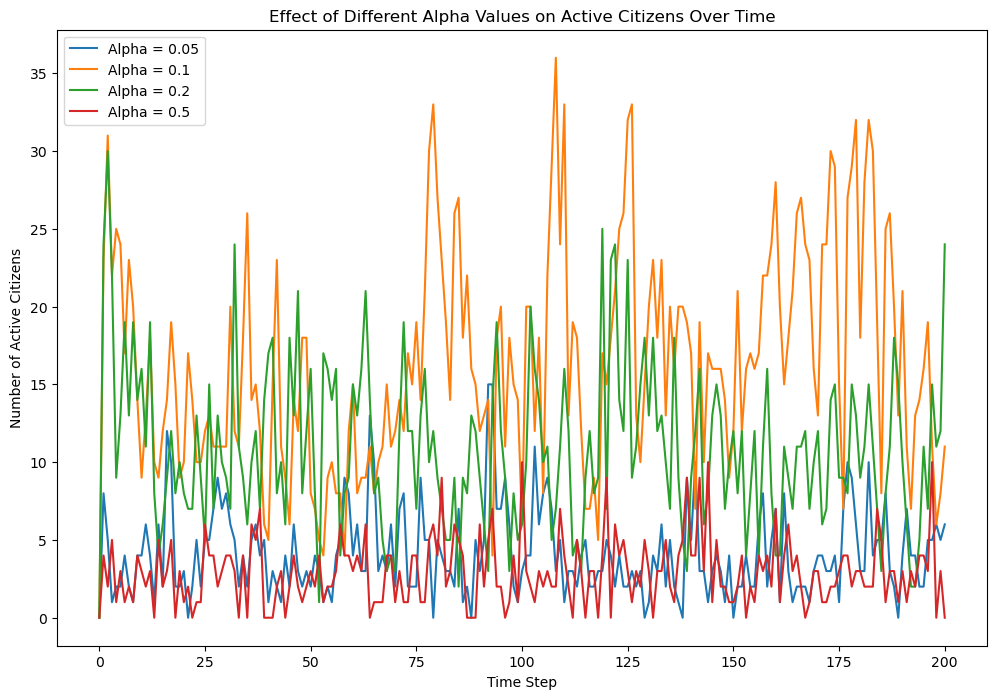

In [10]:
# figure5

def run_model_with_different_alpha(alpha):
    model = EpsteinNetworkCivilViolence(
        width=20,
        height=20,
        citizen_density=0.7,
        cop_density=0.06,
        citizen_vision=3,
        cop_vision=3,
        legitimacy=0.8,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000,
        alpha=alpha,
        jail_factor=1.1,
        legitimacy_impact=0.01
    )
    
    for _ in range(200):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

alpha_values = [0.05, 0.1, 0.2, 0.5]
results = {}

for alpha in alpha_values:
    results[alpha] = run_model_with_different_alpha(alpha)


plt.figure(figsize=(12, 8))
for alpha, active_data in results.items():
    plt.plot(active_data, label=f'Alpha = {alpha}')  
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different Alpha Values on Active Citizens Over Time')
plt.legend()
plt.show()

Outburst ends at step 64
Outburst starts, wait time recorded: 113
Outburst ends at step 178
Outburst starts, wait time recorded: 1
Outburst ends at step 180
Outburst starts, wait time recorded: 211
Outburst ends at step 395
Outburst starts, wait time recorded: 115
Outburst ends at step 513
Outburst starts, wait time recorded: 7
Outburst ends at step 522
Outburst starts, wait time recorded: 77
Outburst ends at step 603
Outburst starts, wait time recorded: 49
Outburst ends at step 657
Outburst starts, wait time recorded: 67
Outburst ends at step 725
Outburst ends at step 26
Outburst starts, wait time recorded: 57
Outburst ends at step 93
Outburst starts, wait time recorded: 120
Outburst ends at step 220
Outburst starts, wait time recorded: 84
Outburst ends at step 311
Outburst starts, wait time recorded: 83
Outburst ends at step 398
Outburst starts, wait time recorded: 1
Outburst ends at step 400
Outburst starts, wait time recorded: 135
Outburst ends at step 538
Outburst starts, wait tim

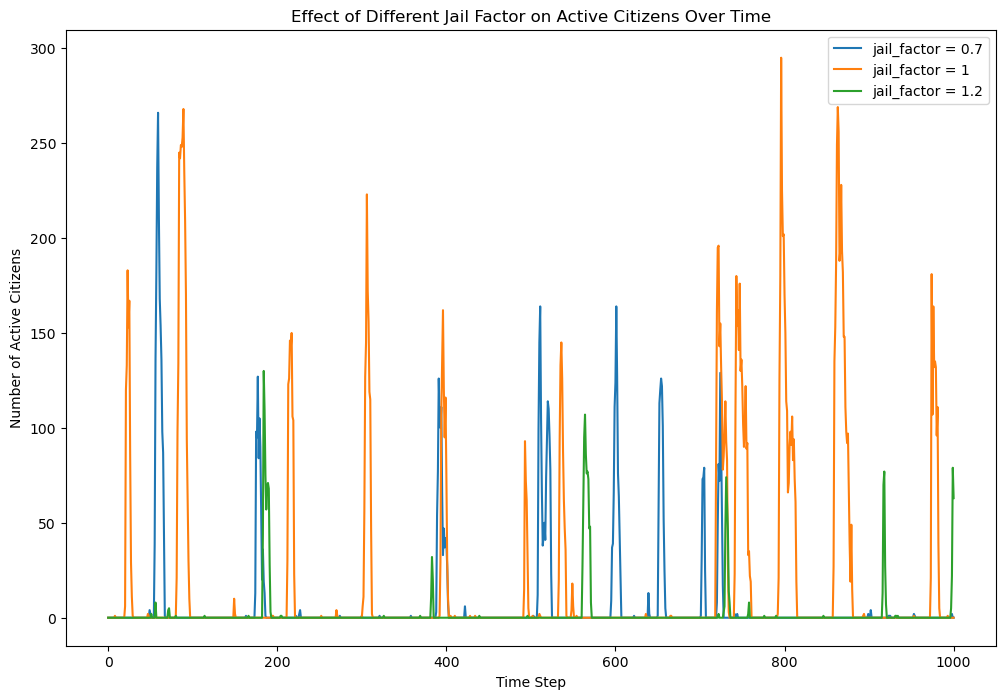

In [21]:
def run_model_with_different_jail_factor(jail_factor):
    model = EpsteinNetworkCivilViolence(
        width=40,
        height=40,
        citizen_density=0.7,
        cop_density=0.05,
        citizen_vision=6,
        cop_vision=6,
        legitimacy=0.86,
        max_jail_term=15,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000,
        alpha=0.1,
        impact_chance=0.5,
        legitimacy_impact=0.01,
        incitation_threshold=10
    )
    
    for _ in range(1000):
        model.step()
    data = model.datacollector.get_model_vars_dataframe()
    return data['Active']  

jail_factor_values = [0.7, 1, 1.2]
results = {}

for jail_factor in jail_factor_values:
    results[jail_factor] = run_model_with_different_jail_factor(jail_factor)


plt.figure(figsize=(12, 8))
for jail_factor, active_data in results.items():
    plt.plot(active_data, label=f'jail_factor = {jail_factor}')  
plt.xlabel('Time Step')
plt.ylabel('Number of Active Citizens')
plt.title('Effect of Different Jail Factor on Active Citizens Over Time')
plt.legend()
plt.show()

In [ ]:
# figure7
model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.04,
    citizen_vision=5,
    cop_vision=5,
    legitimacy=0.85,
    max_jail_term=15,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
    alpha=0.5,
    jail_factor=1.1,
    impact_chance=0.5,
    legitimacy_impact=0.01,
    incitation_threshold=10
    
)

for _ in range(1000):
    model.step()

# Data for plotting
outburst_sizes = model.outburst_sizes

# Define the bins for the histogram
bins = range(0, max(outburst_sizes) + 100, 100)  # Adjust bin size and range as needed

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(outburst_sizes, bins=bins, color='black', edgecolor='white')
plt.xlabel('Total Activation')
plt.ylabel('Frequency')
plt.title('Outburst Size Distribution')
plt.show()

Outburst ends at step 57
Outburst starts, wait time recorded: 1
Outburst ends at step 59
Outburst starts, wait time recorded: 1
Outburst ends at step 61
Outburst starts, wait time recorded: 1
Outburst ends at step 130
Outburst starts, wait time recorded: 2
Outburst ends at step 151
Outburst starts, wait time recorded: 2
Outburst ends at step 171
Outburst starts, wait time recorded: 2
Outburst ends at step 211
Outburst starts, wait time recorded: 1
Outburst ends at step 253
Outburst starts, wait time recorded: 5
Outburst ends at step 310
Outburst starts, wait time recorded: 1
Outburst ends at step 313
Outburst starts, wait time recorded: 1
Outburst ends at step 413
Outburst starts, wait time recorded: 7
Outburst ends at step 434
Outburst starts, wait time recorded: 1
Outburst ends at step 436
Outburst starts, wait time recorded: 2
Outburst ends at step 463
Outburst starts, wait time recorded: 1
Outburst ends at step 477
Outburst starts, wait time recorded: 1
Outburst ends at step 585
Ou

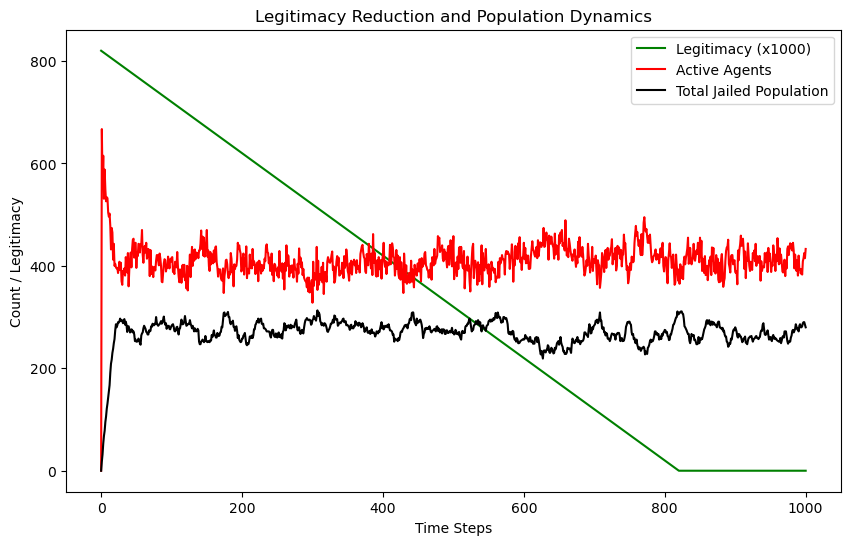

In [2]:
# Figure9&10
model = EpsteinNetworkCivilViolence(
    width=40, height=40, citizen_density=0.7, cop_density=0.04,
    citizen_vision=2, cop_vision=2, legitimacy=0.82, max_jail_term=30,
    active_threshold=0.1, arrest_prob_constant=2.3, movement=True, max_iters=1000, legitimacy_mode='gradual', cop_density_mode='constant',alpha=0.1,
    jail_factor=1.1, impact_chance=0.5, legitimacy_impact=0.01, incitation_threshold=10
)
for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# plot
plt.figure(figsize=(10, 6))
plt.plot(data['Legitimacy']*1000, label='Legitimacy (x1000)', color='green')
plt.plot(data['Active'], label='Active Agents', color='red')
plt.plot(data['Jailed'], label='Total Jailed Population', color='black')
plt.xlabel('Time Steps')
plt.ylabel('Count / Legitimacy')
plt.title('Legitimacy Reduction and Population Dynamics')
plt.legend()
plt.show()

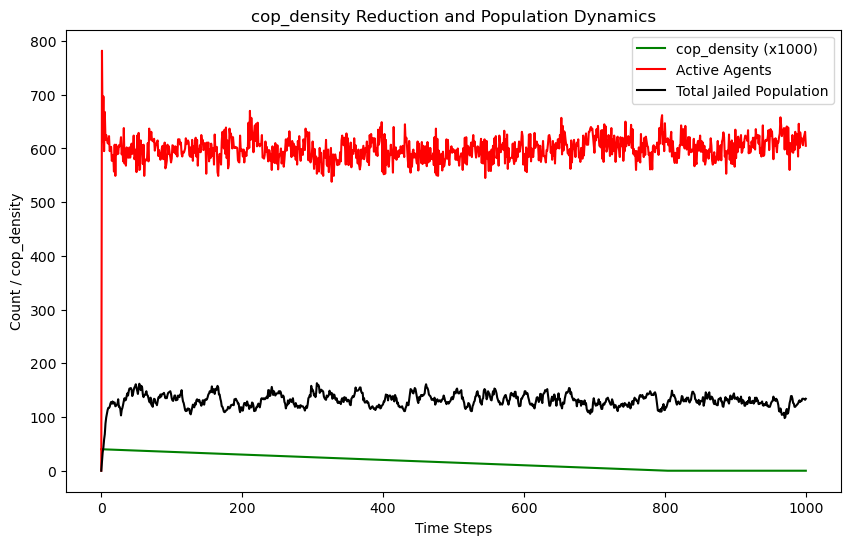

In [3]:
# Figure11
model = EpsteinNetworkCivilViolence(
    width=40, height=40, citizen_density=0.7, cop_density=0.04,
    citizen_vision=2, cop_vision=2, legitimacy=0.7, max_jail_term=15,
    active_threshold=0.1, arrest_prob_constant=2.3, movement=True, max_iters=1000, legitimacy_mode='constant', cop_density_mode='gradual', alpha=0.1,
    jail_factor=1.1, impact_chance=0.5, legitimacy_impact=0.01, incitation_threshold=10
)
for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# plot
plt.figure(figsize=(10, 6))
plt.plot(data['Cop_Density']*1000, label='cop_density (x1000)', color='green')
plt.plot(data['Active'], label='Active Agents', color='red')
plt.plot(data['Jailed'], label='Total Jailed Population', color='black')
plt.xlabel('Time Steps')
plt.ylabel('Count / cop_density')
plt.title('cop_density Reduction and Population Dynamics')
plt.legend()
plt.show()

Index(['x', 'y', 'breed', 'jail_sentence', 'condition', 'arrest_probability'], dtype='object')


KeyError: 'legitimacy'

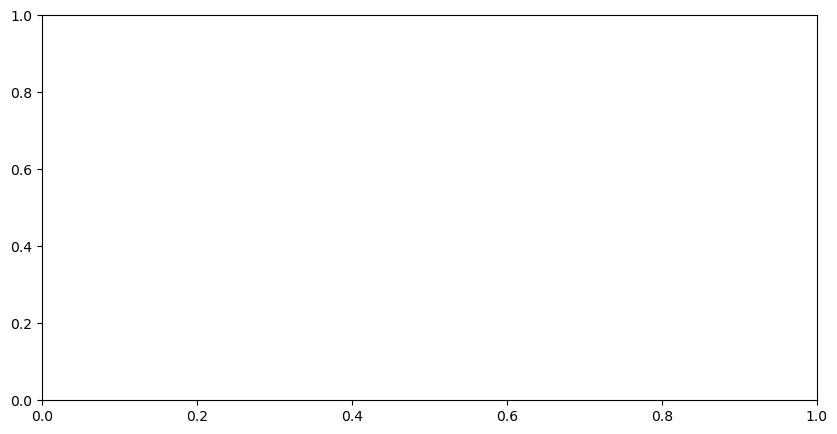

In [13]:
model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=300,
    alpha=0.1,
    jail_factor=1.1,
    legitimacy_impact=0.2,
    use_mean_field=True,
    legitimacy_width=0.1,
    cop_density_mode='constant',
    legitimacy_mode='constant'
)

for i in range(51):  # 运行模型51步
    model.step()

# 提取数据
agent_data = model.datacollector.get_agent_vars_dataframe()

# 检查数据框中是否存在 "legitimacy" 列
print(agent_data.columns)

# 选择特定时间步的数据
time_steps = [50]
fig, axs = plt.subplots(len(time_steps), 1, figsize=(10, 5))

for i, step in enumerate(time_steps):
    step_data = agent_data.xs(step, level="Step")
    legitimacy_values = step_data['legitimacy']

    # 绘制直方图
    axs[i].hist(legitimacy_values, bins=20, edgecolor='black')
    axs[i].set_title(f'Legitimacy Distribution at Time Step {step}')
    axs[i].set_xlabel('Legitimacy')
    axs[i].set_ylabel('Number of Citizens')

plt.tight_layout()
plt.show()